In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Ecommerce Customers")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.shape

(500, 8)

In [8]:
df.info() #gives the information about each column the type of data nad if it is null or non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [10]:
df.describe() #gives statistical information about the numerical variables important to even check after th emodel construction

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


EDA


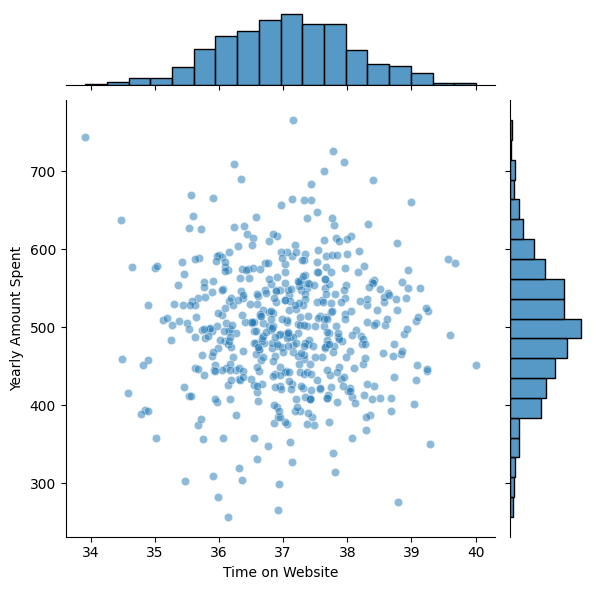

In [17]:
sns.jointplot(data=df,x=df["Time on Website"],y=df["Yearly Amount Spent"],alpha=0.5)

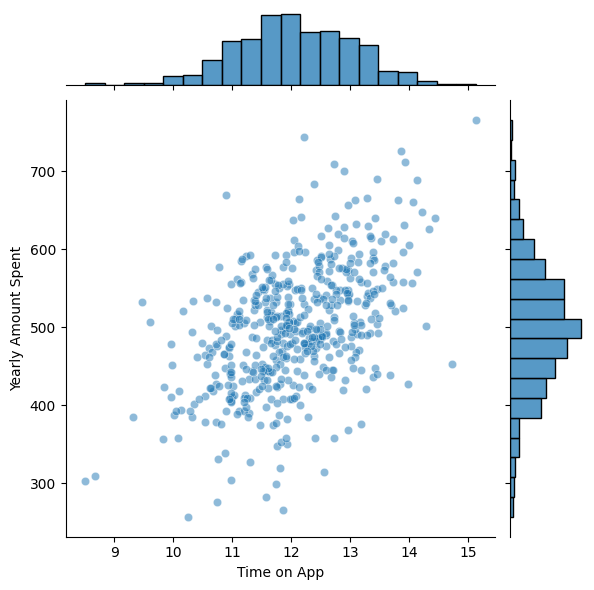

In [18]:
sns.jointplot(data=df,x=df["Time on App"],y=df["Yearly Amount Spent"],alpha=0.5)

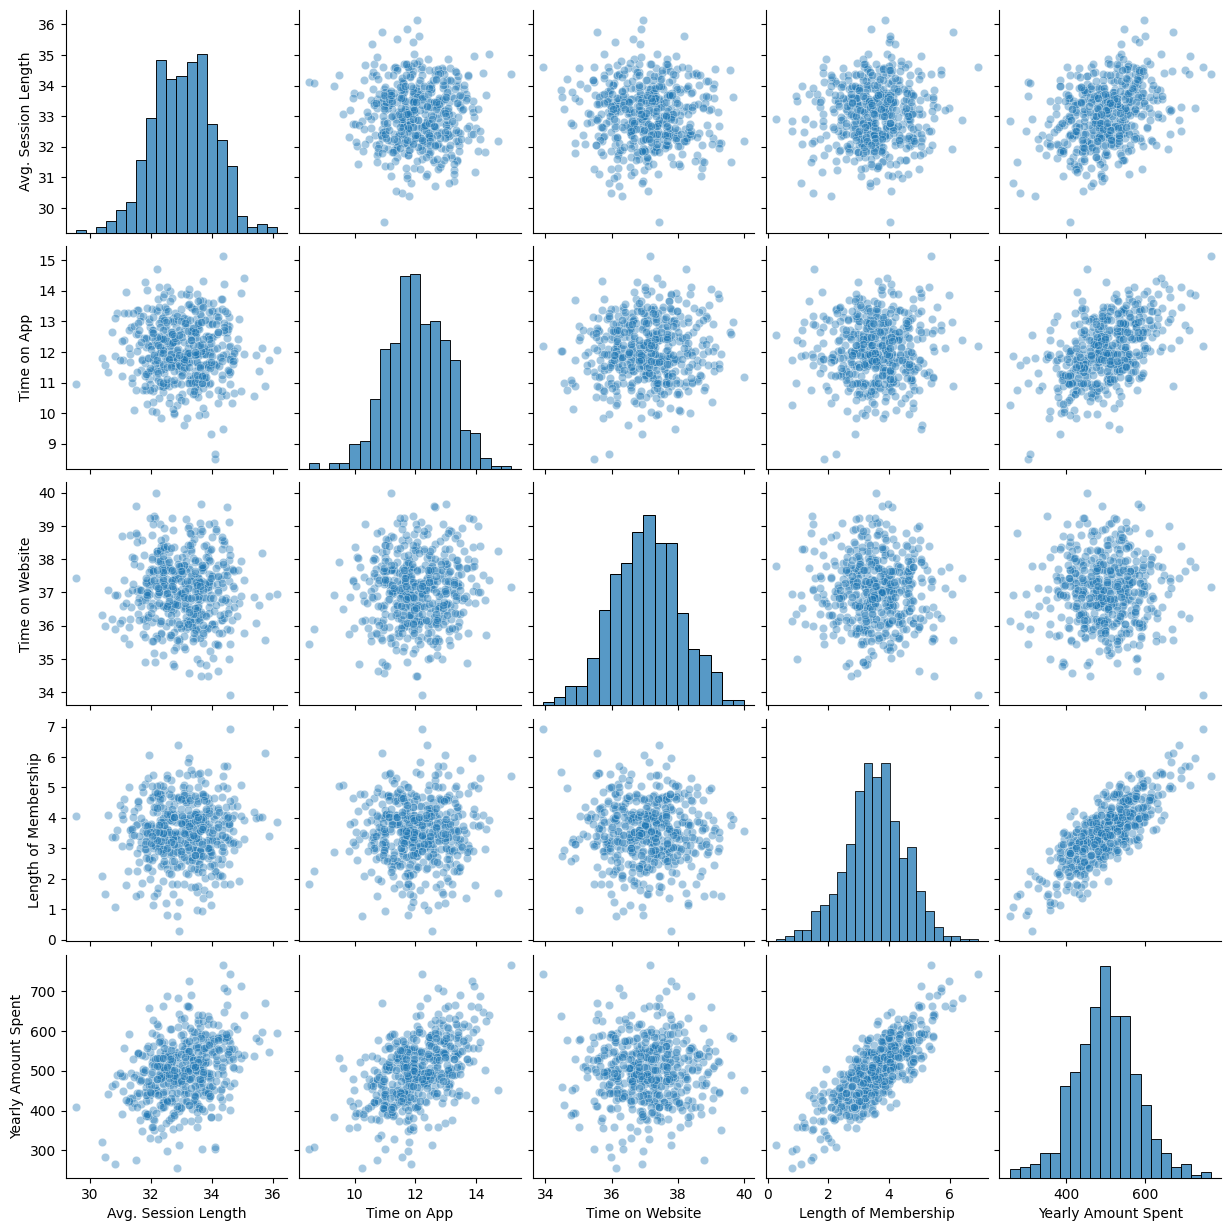

In [25]:
sns.pairplot(df,kind="scatter",plot_kws={'alpha':0.4}) #understanding the correlations in my dataset

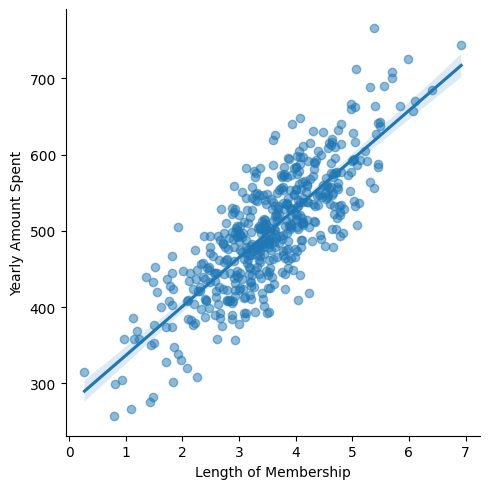

In [28]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df,scatter_kws={'alpha':0.5})

In [29]:
from sklearn.model_selection import train_test_split

In [53]:
X=df[["Avg. Session Length","Time on App","Time on Website","Length of Membership"]]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [54]:
y=df[["Yearly Amount Spent"]]
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [56]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
303,30.816201,11.851399,36.925043,1.084585
202,31.525752,11.340036,37.039514,3.811248
349,32.008505,12.095889,36.377509,3.178952
272,34.436426,13.325469,36.768603,3.371258
192,33.694898,11.202670,35.493964,4.015987
...,...,...,...,...
385,33.236266,10.972554,34.574028,2.931620
197,32.407148,13.808799,37.426769,5.039955
439,33.918844,12.428737,37.305362,4.158215
174,33.432231,10.859609,38.835670,3.669226


In [57]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
66,33.078717,12.695790,35.358444,4.001786
152,32.510218,10.984836,37.396497,5.391275
123,31.358477,12.809883,36.549668,3.637701
285,32.872739,12.093966,36.620774,3.049196
70,33.154176,11.887494,36.265001,2.602287
...,...,...,...,...
13,33.190334,12.959226,36.144667,3.918542
166,33.630801,12.039648,38.924087,2.873008
275,32.363121,12.461135,37.745608,4.664258
92,33.471601,11.662263,36.050241,3.997255


In [58]:
y_train

,Yearly Amount Spent
303,266.086341
202,443.965627
349,443.197221
272,582.491924
192,505.119638
...,...
385,414.935061
197,662.961088
439,565.994363
174,465.176623


In [59]:
y_test

,Yearly Amount Spent
66,553.601535
152,555.892595
123,495.175950
285,471.602884
70,444.966552
...,...
13,573.415867
166,497.811930
275,570.630098
92,515.828815


TRAININ THE MODEL

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [62]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
lr.coef_

array([[25.35152192, 38.89277158,  0.89734947, 61.81047946]])

In [64]:
lr.intercept_

array([-1059.23335736])

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [68]:
mse=mean_squared_error(y_test,lr.predict(X_test))
mse

115.7775504696995

In [70]:
mae=mean_absolute_error(y_test,lr.predict(X_test))
mae

8.330043191488457

In [71]:
y_pred=lr.predict(X_test)

In [73]:
r2=r2_score(y_test,y_pred)
r2

0.9738519858603063

Text(0.5, 1.0, 'Our ML model')

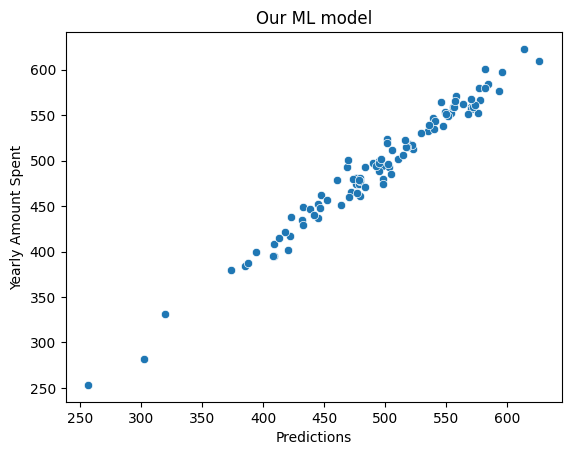

In [86]:
sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())
plt.ylabel("Yearly Amount Spent")
plt.xlabel("Predictions")
plt.title("Our ML model")

Residuals

In [87]:
residuals=y_test-y_pred

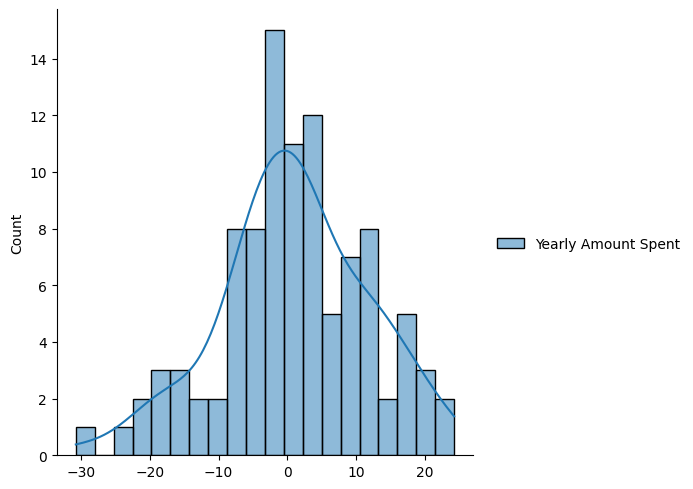

In [95]:
sns.displot(residuals,bins=20,kde=True)

<Axes: >

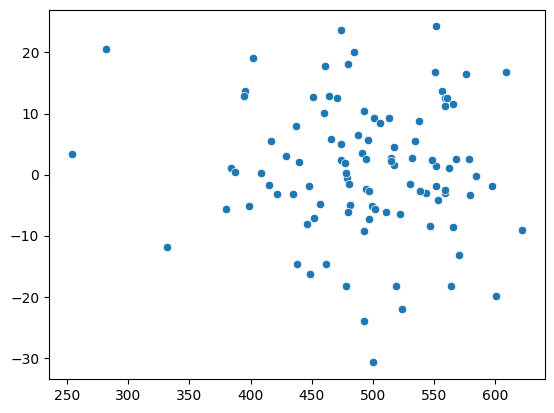

In [101]:
sns.scatterplot(x=y_pred.ravel(),y=residuals.values.ravel())


In [108]:
import numpy as np
new_customer = np.array([[34, 10, 100, 5]])

In [109]:
lr.predict(new_customer)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[590.43344823]])

CONCLUSION: the coefficient of Time on Spent on App is much higher than the time spent on website so company must focus on improving mobile app experience.